In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, signal
from scipy.interpolate import  LSQUnivariateSpline 
import numdifftools as nd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

https://stackoverflow.com/questions/78568011/how-to-compute-the-derivative-of-a-spline-in-scipy-including-the-edges

In [2]:
# Example noisy data
np.random.seed(42)
NTime = 100
time = np.linspace(-0.1, 1.1,  NTime)
y_true = np.sin(2 * np.pi * time)
y_noisy = y_true + np.random.normal(scale=0.1, size=time.shape)

In [3]:
y_smooth = signal.savgol_filter(y_noisy, 41, 3)
dy_smooth = signal.savgol_filter(y_noisy, 41, 3, deriv=1, delta=np.diff(time)[0])

In [4]:
kernel = 1 * RBF()
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=0.1**2)
gaussian_process.fit(time.reshape(-1,1), y_noisy)

GaussianProcessRegressor(alpha=0.010000000000000002,
                         kernel=1**2 * RBF(length_scale=1))

In [5]:
yhat = gaussian_process.predict(time.reshape(-1,1))

In [6]:
n_knots = 10
knots = np.linspace(time[5], time[-6], n_knots)
spline = LSQUnivariateSpline(time, yhat, knots, k=5)

In [7]:
y_spline = spline(time)
dspline = spline.derivative(1)
dy_spline = dspline(time)

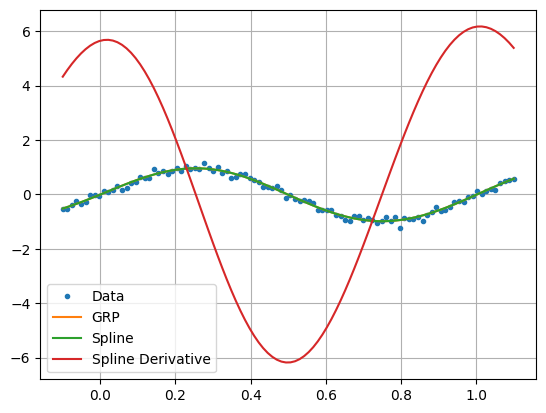

In [8]:
fig, axe = plt.subplots()
axe.plot(time, y_noisy, linestyle="None", marker='.', label="Data")
#axe.plot(time, y_smooth, label="Sav-Gol")
axe.plot(time, yhat, label="GRP")
#axe.plot(time, dy_smooth, label="Sav-Gol Derivative")
axe.plot(time, y_spline, label="Spline")
axe.plot(time, dy_spline, label="Spline Derivative")
axe.legend()
axe.grid()

In [9]:
df = nd.Derivative(spline)

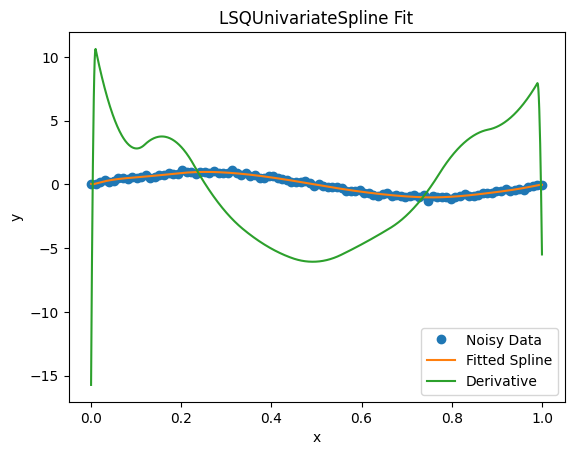

In [10]:
# Example noisy data
np.random.seed(42)
NTime = 100
time = np.linspace(0, 1,  NTime)
y_true = np.sin(2 * np.pi * time)
y_noisy = y_true + np.random.normal(scale=0.1, size=time.shape)


# Specify the number of knots and their initial locations
n_knots = 10
# Generate n_knots internal knots between the second and second-to-last time points
knots = np.linspace(time[1], time[-2], n_knots)
 
k = 3

# Fit the spline
spline = LSQUnivariateSpline(time, y_noisy, knots, k=3)

# Evaluate the spline and its derivative on a fine mesh
t_fine = np.linspace(time[0], time[-1], 1000)
y_fine = spline(t_fine)
y_fine_derivative = spline.derivative()(t_fine)

# Plot the results
plt.figure()
plt.plot(time, y_noisy, 'o', label='Noisy Data')
plt.plot(t_fine, y_fine, label='Fitted Spline')
plt.plot(t_fine, y_fine_derivative, label='Derivative')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('LSQUnivariateSpline Fit')
plt.show()